# 神经网络和机器学习之手写体数字识别

案例说明：手写体识别，使用卷积神经网络（CNN）

手写体识别，是人工智能中的经典难题。这个案例中，我们需要搭建神经网络，让计算机识别大量的手写体的图片，然后手写一张图片让计算机来识别。

用计算机处理手写体文字在之前一直是个难题，因为每个人的书写风格、书写习惯都不同，很难通过传统算法对书写内容进行判断。而卷积神经网络(Convolutional Neural Networks，简称 CNN)在处理这类问题上有非常好的表现，通过准备好的大量手写体训练样本，可以让计算机“学会”认识手写文字。

案例选择了keras框架，需要先安装keras和tensorflow。

**注** 本案例使用标准的lenet-5模型，测试模型的泛化效果是否高于原来的写法。

## 1.环境搭建

下面是安装命令：

pip install keras

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

建议选择清华源，速度将快很多。参考命令如下：

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

## 2.数据准备

Mnist数据集是由Yann LeCun等人建立的一个手写体数据集，其中包括了60000张不同人书写的0-9数字组成的训练图片以及10000张测试图片，每张图片为28*28像素的灰度图。

开始导入数据集吧。第一次使用这个数据集，计算机要先通过网络下载，需要等待一定的时间。建议还是另外下载，放在相应的文件夹中。

Windows（Win10）：c:\Users\uesr_name\.keras\datasets

Mac OS：~/.keras/datasets/

Linux：~/.keras/datasets/

Keras自带数据集下载地址：https://github.com/zionfuo/keras-datasets

In [1]:
from keras.datasets import mnist
import numpy as np

### 导入数据集

In [2]:
(train_i,train_label),(test_i,test_label)=mnist.load_data()

### 问题：如何导入本地数据集

如果Keras自带数据集无法下载成功，或者下载后没有放在相应的文件夹中，可以用下面的语句来加载。

In [ ]:
path='./data/mnist.npz'
(train_i,train_label),(test_i,test_label)=datasets.load_data(path)

卷积神经网络要求输入的数据至少4个维度，即索引、长度、高度和通道。mnist数据集中只有3个维度（图像是灰度的，只有一个通道），需要增加一个空的维度。numpy的`expand_dims`用于扩展数组的形状，`axis=-1`表示在最后加上一列。分别输出`train_i.shape`和`test_image.shape`比较一下。

In [3]:
train_image=np.expand_dims(train_i,axis=-1)
test_image=np.expand_dims(test_i,axis=-1) 

In [4]:
train_i.shape

(60000, 28, 28)

In [5]:
train_image.shape

(60000, 28, 28, 1)

使用Python的绘图工具，可以查看测试集与训练集的某张图片，以及对应的标签。

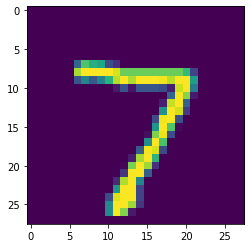

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(test_i[0])

In [7]:
print(test_label[0])

7


**提取数据集内置图片**

In [26]:
## 用matplotlib
import matplotlib
matplotlib.image.imsave('./img/' + str(test_label[0]) + '.png', test_i[0])

用matplotlib保存的图片，是蓝底的，有颜色。

In [28]:
# 用pil
from PIL import Image
im = Image.fromarray(test_i[0])
im.save('./img/' + str(test_label[0]) + '.png')

用PIL保存的图片，是黑底白字。

批量保存0-10的图片。

In [29]:
# 用pil
from PIL import Image
for i in range(10):
    im = Image.fromarray(test_i[i])
    im.save('./img/' + str(test_label[i]) + '.png')

## 3.建立模型

卷积神经网络是一种带有卷积结构的多层神经网络。由于图像的空间联系往往是局部的，因此每个神经元不需要对全部的图像进行感知，只需要感知局部特征，并在更高层将这些不同感知的局部神经元连接起来综合处理即可。并且在卷积神经网络中，不同神经元之间的参数(卷积核)可以共享。因此，使用卷积神经网络可以有效的减少神经网络模型的训练参数，并且具有一定程度对图像位移、缩放、非线性变形的稳定性。

卷积神经网络还有个重要的思想是池化(Pooling)，也称为降采样或下采样，池化可以在保留图像显著特征的前提下减少数据处理量。一般池化方法有最大值池化(Max Pooling)和平均值池化(MEAN Pooling)。

卷积神经网络的结构一般是将输入的图像进行多次卷积、池化，在多次卷积、池化的的过程中图像的图像的尺寸会越来越小、特征会越来越明显，最后输入全连接层完成预测或者分类任务。

在keras中可以通过Conv2D和MaxPool方便的添加卷积层和最大层对图像进行卷积和池化，通过以下代码建立卷积神经网络模型并进行编译。

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='valid', input_shape=(28, 28, 1), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='valid', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

编译模型，并且在训练过程中打印出准确率（acc）指标。

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) 

## 4.训练模型

In [20]:
model.fit(x=train_image,y=train_label,batch_size=500,epochs=5,validation_data=(test_image,test_label))

Epoch 1/5
120/120 [==============================] - 16s 131ms/step - loss: 0.0119 - acc: 0.9969 - val_loss: 0.0501 - val_acc: 0.9853
Epoch 2/5
120/120 [==============================] - 16s 130ms/step - loss: 0.0106 - acc: 0.9975 - val_loss: 0.0494 - val_acc: 0.9849
Epoch 3/5
120/120 [==============================] - 15s 129ms/step - loss: 0.0081 - acc: 0.9983 - val_loss: 0.0488 - val_acc: 0.9855
Epoch 4/5
120/120 [==============================] - 16s 130ms/step - loss: 0.0072 - acc: 0.9986 - val_loss: 0.0501 - val_acc: 0.9848
Epoch 5/5
120/120 [==============================] - 16s 132ms/step - loss: 0.0064 - acc: 0.9988 - val_loss: 0.0514 - val_acc: 0.9854


train_label和test_label中分别存储训练集与测试集中每张手写体图片中的数字标签，可以通过代码查看测试集前10张图片的数字标签。
**注意：**在i5的电脑上，训练15轮达到0.9959

In [21]:
print(test_label[0:10])

[7 2 1 0 4 1 4 9 5 9]


再利用模型来识别测试中前10张图片的内容，可以看到图片中的手写数字被成功的识别了出来。

In [22]:
t=model.predict(test_image[0:10]).tolist()
for i in range(len(t)):
    tt=max(t[i])
    print(t[i].index(tt))

7
2
1
0
4
1
4
9
5
9


用np的argmax方法，直接输出识别结果。

In [23]:
r = np.argmax(model.predict(test_image[0:10]), axis=-1)
print(r)

[7 2 1 0 4 1 4 9 5 9]


## 5.保存模型

训练出来的模型，可以保存。下次使用的时候载入，还可以继续训练。一般保存为h5格式，需要先安装h5py。

命令如下：pip install h5py

In [24]:
model.save('./model/3-model-lenet.h5')   # HDF5文件

## 6.应用模型

下次用这个语句载入，就可以直接使用了。

In [18]:
from keras.models import load_model  
model = load_model('./model/3-model-lenet.h5')
#如果是高版本keras训练的模型，导入时要加上这个参数。
#model = load_model('./model/3-model-lenet.h5', compile=False)

手写一个数字吧，用这个模型识别一下。这里提供了用摄像头拍摄照片的代码，也可以上传图片，名称为：test.jpg）。

**下面是利用虚谷号的摄像头拍摄图片的代码，没有摄像头请跳过，直接上传一张名为test.jpg的图片。**

In [19]:
import cv2
#基本函数1：获取摄像头内容保存为图片
def getcampic(fname):
    cap = cv2.VideoCapture(0)        # 打开摄像头
    ret, frame = cap.read()       # 读摄像头
    cv2.imwrite(fname,frame)
    cap.release()      
    cv2.destroyAllWindows() 
    return True
##调用getcampic函数
getcampic("test.jpg")

ModuleNotFoundError: No module named 'cv2'

In [ ]:
# 加载图像test.jpg
from keras.preprocessing import image
from keras.preprocessing.image import load_img
img = load_img('test.jpg',target_size=(28, 28),grayscale=True)
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img)

准备好图片，识别后输出结果。

In [ ]:
i_img=[]
import numpy as np
img =image.img_to_array(img,dtype="uint8")
i_img.append(img)
#发现训练集中的数据，都是黑底白字，而这里是白底黑字，于是先进行矩阵计算，实现图像的“反转”。
np_image = 255 - np.array(i_img)
# 转化为真黑底白字
np_image[np_image > 180] = 255
np_image[np_image < 181] = 0
import numpy as np
r = np.argmax(model.predict(np_image), axis=-1)
print(r)

至此，这个手写体数字的机器学习案例全部完成。